In [26]:
from matplotlib import pyplot as plt
from aeon.forecasting.compose import make_reduction
from aeon.datasets import load_airline
from sklearn.ensemble import GradientBoostingRegressor
from aeon.utils.plotting import plot_series
import numpy as np
import pandas as pd
from aeon.forecasting.model_selection import temporal_train_test_split
from aeon.forecasting.compose import ForecastX
from aeon.forecasting.var import VAR
from aeon.performance_metrics.forecasting import mean_absolute_percentage_error


In [27]:
y = load_airline()

In [28]:
random_data = np.random.random((y.shape[0], 3))
cols = [f'X{i+1}' for i in range(random_data.shape[1])]
X = pd.DataFrame(data=random_data, columns=cols, index=y.index)
X.head()

,X1,X2,X3
Period,,,
1949-01,0.781230,0.217284,0.906155
1949-02,0.719300,0.088794,0.922062
1949-03,0.649946,0.038893,0.893621
1949-04,0.113345,0.277534,0.029154
1949-05,0.952468,0.008073,0.806332


In [29]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
X_train, X_test = temporal_train_test_split(X, test_size=36)

In [30]:
fh = np.arange(len(y_test)) + 1

In [31]:
regressor = GradientBoostingRegressor(max_depth=None)

In [32]:
forecaster = make_reduction(regressor, window_length=20, strategy='recursive')

In [33]:
forecasterX = ForecastX(
    forecaster_X = VAR(),
    forecaster_y = forecaster
)

In [34]:
forecasterX.fit(y_train, X=X_train, fh=fh)

ForecastX(forecaster_X=VAR(),
          forecaster_y=RecursiveTabularRegressionForecaster(estimator=GradientBoostingRegressor(max_depth=None),
                                                            window_length=20))

In [35]:
y_pred = forecasterX.predict(fh=fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

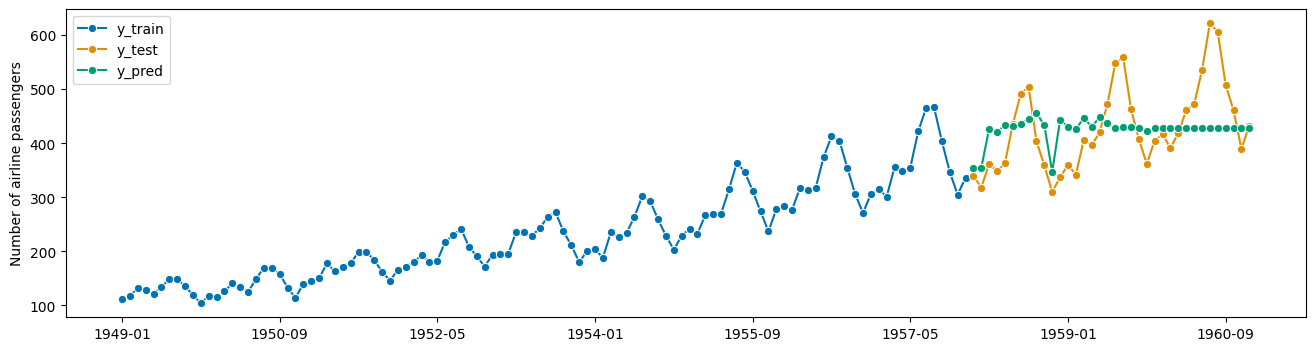

In [36]:
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])

In [37]:
mean_absolute_percentage_error(y_test, y_pred)

0.13225127639545342